In [1]:
import matplotlib.pyplot as plt
import torch as tr
import numpy as np
%matplotlib inline

In [2]:
tr.__version__

'2.0.0'

In [3]:
x = np.ones(5)
x, x.ndim, x.size

(array([1., 1., 1., 1., 1.]), 1, 5)

In [4]:
y = tr.from_numpy(x)
y, y.size(), y.ndim

(tensor([1., 1., 1., 1., 1.], dtype=torch.float64), torch.Size([5]), 1)

In [5]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [6]:
y = y.to(tr.uint8)
y.dtype

torch.uint8

In [7]:
x[2] = 0
y[3] = 5
x,y

(array([1., 1., 0., 1., 1.]), tensor([1, 1, 1, 5, 1], dtype=torch.uint8))

In [8]:
tr.cuda.is_available()

True

In [9]:
device = tr.device('cuda')

In [10]:
device

device(type='cuda')

In [11]:
a = np.ones(5)
b = tr.from_numpy(a)
b.to(device)
# assert id(a)==id(b)
a[3]=0
b[1]= 4
a,b, a is b, b is a

(array([1., 4., 1., 0., 1.]),
 tensor([1., 4., 1., 0., 1.], dtype=torch.float64),
 False,
 False)

In [12]:
b.device

device(type='cpu')

In [13]:
b=b.to(device)
b.device, a


(device(type='cuda', index=0), array([1., 4., 1., 0., 1.]))

In [14]:
b = tr.tensor([1,1,1,5,1], dtype=tr.float)
b, b.requires_grad

(tensor([1., 1., 1., 5., 1.]), False)

In [15]:
b.requires_grad_(True)
print(b.grad)

None


In [16]:
l = sum((b-1)**2)
print(l)
l.backward()
print(l)


tensor(16., grad_fn=<AddBackward0>)
tensor(16., grad_fn=<AddBackward0>)


In [17]:
m = sum((b.data-1)**2)
print(m, type(m))
# m.backward() # RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn


tensor(16.) <class 'torch.Tensor'>


In [18]:
n = sum((b-1)**2)
print(n, type(n),m.ndim,n.ndim)

tensor(16., grad_fn=<AddBackward0>) <class 'torch.Tensor'> 0 0


In [19]:
# b-1,sum((b-1)**2)
# n.backward() ## result in error
#RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.#
n.backward(retain_graph=True)

In [20]:
print(b.grad)

tensor([ 0.,  0.,  0., 16.,  0.])


In [21]:
m.requires_grad_(True)
m.backward()

In [22]:
print(m)

tensor(16., requires_grad=True)


In [23]:
print(b.grad)

tensor([ 0.,  0.,  0., 16.,  0.])


In [24]:
!pip install torchviz
from torchviz import make_dot


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=6b9f868c9fed777b65518d1c65914e2ecbbcb020be93bc1de24aeb5d244e4015
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


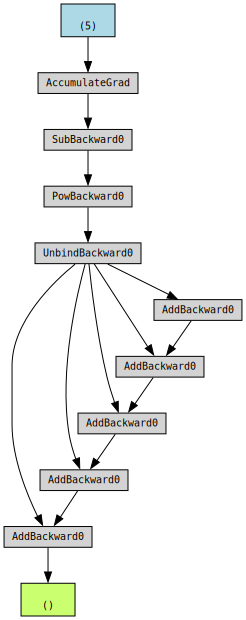

In [25]:
make_dot(l)

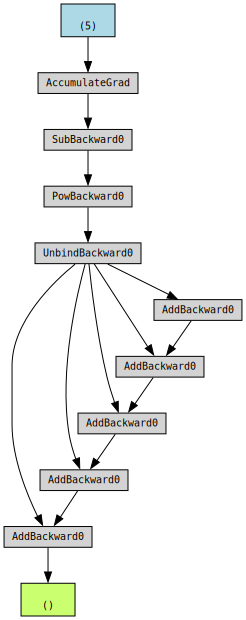

In [26]:
make_dot(n)